In [104]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [105]:
df= pd.read_csv('datasets/car_evaluation.csv')
df.head()

,vhigh,vhigh.1,2,2.1,small,low,unacc
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [106]:
df.shape

(1727, 7)

In [107]:
#Changing the columns name
columns_name = ['buying','maintance','doors','persons','lug_boot','safety','class']
df.columns =columns_name
df.head()

,buying,maintance,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1727 entries, 0 to 1726
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   buying     1727 non-null   object
 1   maintance  1727 non-null   object
 2   doors      1727 non-null   object
 3   persons    1727 non-null   object
 4   lug_boot   1727 non-null   object
 5   safety     1727 non-null   object
 6   class      1727 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [109]:
df['class'].value_counts()

unacc    1209
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [110]:
df.isnull().sum()

buying       0
maintance    0
doors        0
persons      0
lug_boot     0
safety       0
class        0
dtype: int64

In [111]:
x=df.drop('class', axis = 1,inplace = False)
y= df['class']

In [112]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size =0.3,random_state=10)

In [113]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(1208, 6)
(1208,)
(519, 6)
(519,)


In [114]:
!pip install category_encoders

In [115]:
import category_encoders as ce

In [118]:
encoder = ce.OrdinalEncoder(cols=['buying','maintance','doors','persons','lug_boot','safety'])

In [119]:
xtrain = encoder.fit_transform(xtrain)
xtest = encoder.fit_transform(xtest)
xtrain.head()

,buying,maintance,doors,persons,lug_boot,safety
593,1,1,1,1,1,1
1316,2,2,2,2,2,1
936,3,2,1,2,1,2
803,1,3,3,2,2,1
821,1,3,1,3,2,1


In [143]:
from sklearn.tree import DecisionTreeClassifier
dtc= DecisionTreeClassifier(criterion ='gini',max_depth=4,random_state=0)
dtc.fit(xtrain,ytrain)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [144]:
ypred= dtc.predict(xtest)


In [145]:
#Checking the accuracy_of_model                                                                                                                               
from sklearn.metrics import accuracy_score
print(accuracy_score(ytest,ypred))

0.8285163776493256


In [146]:
#comparing the train_set and test_set accuracy
ypred_train = dtc.predict(xtrain)
print(accuracy_score(ytrain,ypred_train))

0.8352649006622517


[Text(167.4, 391.392, 'X[5] <= 1.5\ngini = 0.454\nsamples = 1208\nvalue = [261, 53, 851, 43]'),
 Text(83.7, 304.416, 'gini = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]'),
 Text(251.10000000000002, 304.416, 'X[3] <= 1.5\ngini = 0.58\nsamples = 798\nvalue = [261, 53, 441, 43]'),
 Text(167.4, 217.44, 'gini = 0.0\nsamples = 272\nvalue = [0, 0, 272, 0]'),
 Text(334.8, 217.44, 'X[1] <= 2.5\ngini = 0.634\nsamples = 526\nvalue = [261, 53, 169, 43]'),
 Text(167.4, 130.464, 'X[0] <= 3.5\ngini = 0.521\nsamples = 260\nvalue = [121, 0, 133, 6]'),
 Text(83.7, 43.488, 'gini = 0.491\nsamples = 194\nvalue = [121, 0, 67, 6]'),
 Text(251.10000000000002, 43.488, 'gini = 0.0\nsamples = 66\nvalue = [0, 0, 66, 0]'),
 Text(502.20000000000005, 130.464, 'X[0] <= 3.5\ngini = 0.646\nsamples = 266\nvalue = [140, 53, 36, 37]'),
 Text(418.5, 43.488, 'gini = 0.688\nsamples = 199\nvalue = [88, 53, 21, 37]'),
 Text(585.9, 43.488, 'gini = 0.348\nsamples = 67\nvalue = [52, 0, 15, 0]')]

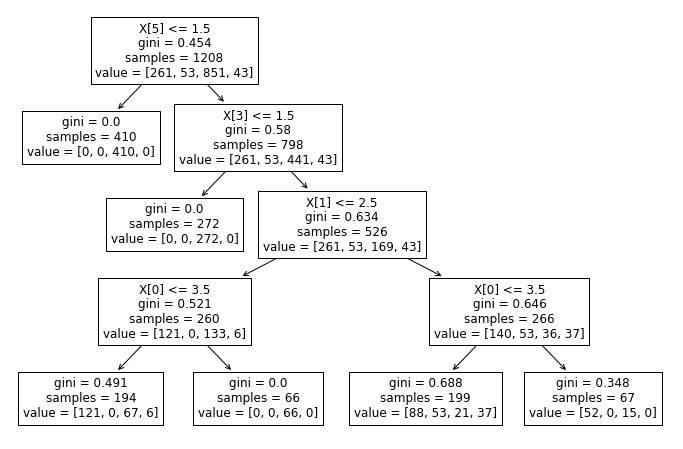

In [147]:
plt.figure(figsize =(12,8))
from sklearn import tree
tree.plot_tree(dtc.fit(xtrain,ytrain))

## Decision Tree using entropy


In [159]:
clf_en = DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=0)

In [155]:
clf_en.fit(xtrain,ytrain)

DecisionTreeClassifier(criterion='entropy', max_depth=2, random_state=0)

In [156]:
clf_pred = clf_en.predict(xtest)

In [157]:
print(accuracy_score(ytest,clf_pred))


0.7707129094412332


[Text(267.84000000000003, 362.4, 'X[5] <= 1.5\nentropy = 1.203\nsamples = 1208\nvalue = [261, 53, 851, 43]'),
 Text(133.92000000000002, 217.44, 'entropy = 0.0\nsamples = 410\nvalue = [0, 0, 410, 0]'),
 Text(401.76000000000005, 217.44, 'X[3] <= 1.5\nentropy = 1.487\nsamples = 798\nvalue = [261, 53, 441, 43]'),
 Text(267.84000000000003, 72.47999999999996, 'entropy = 0.0\nsamples = 272\nvalue = [0, 0, 272, 0]'),
 Text(535.6800000000001, 72.47999999999996, 'entropy = 1.657\nsamples = 526\nvalue = [261, 53, 169, 43]')]

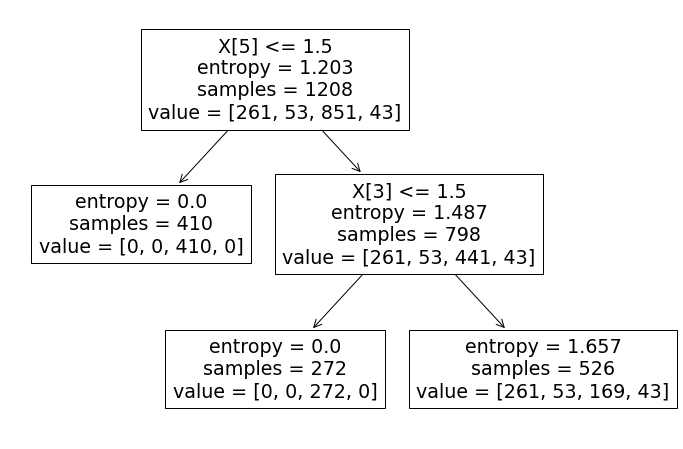

In [158]:
plt.figure(figsize=(12,8))

from sklearn import tree
tree.plot_tree(clf_en.fit(xtrain,ytrain))

## Using losgistic Regreesion

In [160]:
from sklearn.linear_model import LogisticRegression
lg = LogisticRegression()

In [161]:
lg.fit(xtrain,ytrain)
ypredict = lg.predict(xtest)

C:\Users\Vishwajeet Sangolkar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [162]:
print(accuracy_score(ytest,ypredict))

0.7707129094412332


In [165]:
from sklearn.metrics import confusion_matrix

conf= confusion_matrix(ytest,ypredict)
conf

array([[ 67,   0,  53,   3],
       [  9,   0,   7,   0],
       [ 26,   0, 332,   0],
       [ 18,   0,   3,   1]], dtype=int64)

In [167]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypredict))

              precision    recall  f1-score   support

         acc       0.56      0.54      0.55       123
        good       0.00      0.00      0.00        16
       unacc       0.84      0.93      0.88       358
       vgood       0.25      0.05      0.08        22

    accuracy                           0.77       519
   macro avg       0.41      0.38      0.38       519
weighted avg       0.72      0.77      0.74       519



C:\Users\Vishwajeet Sangolkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishwajeet Sangolkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Vishwajeet Sangolkar\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
